In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

%matplotlib inline
pio.renderers.default='iframe'

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [6]:
df = pd.read_pickle("../../../data_lake/output/df_merged.pkl")

In [7]:
df.head(1)

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C6,C7,C8,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D12,D13,D14,D15,M4,time_id,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


# 2.0 EDA

Check unique

In [8]:
df.nunique()

TransactionID     144233
isFraud                2
TransactionAmt      7830
ProductCD              4
card1               8499
card2                482
card3                103
card4                  4
card5                106
card6                  3
addr1                255
addr2                 72
dist2               1751
P_emaildomain         59
R_emaildomain         60
C1                  1559
C2                  1182
C3                    27
C4                  1202
C6                  1194
C7                  1036
C8                  1236
C10                 1211
C11                 1354
C12                 1126
C13                 1362
C14                  994
D1                   641
D2                   641
D3                   543
D4                   791
D5                   619
D6                   828
D7                   595
D8                 12353
D9                    24
D10                  781
D12                  632
D13                  577
D14                  802


Check nan columns

In [9]:
df.isna().sum() / df.shape[0]

TransactionID     0.000000
isFraud           0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
card2             0.006254
card3             0.001193
card4             0.001276
card5             0.006628
card6             0.001234
addr1             0.419093
addr2             0.419093
dist2             0.739359
P_emaildomain     0.092843
R_emaildomain     0.091172
C1                0.000000
C2                0.000000
C3                0.000000
C4                0.000000
C6                0.000000
C7                0.000000
C8                0.000000
C10               0.000000
C11               0.000000
C12               0.000000
C13               0.000000
C14               0.000000
D1                0.001511
D2                0.784266
D3                0.798527
D4                0.550949
D5                0.770684
D6                0.532888
D7                0.749433
D8                0.480521
D9                0.480521
D10               0.519999
D

In [10]:
df.sample(3)

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C6,C7,C8,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D12,D13,D14,D15,M4,time_id,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
39673,3083573,0,200.000,R,8503,583.0,150.0,visa,226.0,credit,126.0,87.0,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95666,3331337,0,100.000,R,18268,583.0,150.0,visa,226.0,credit,264.0,87.0,NaN,gmail.com,gmail.com,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,333169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_13_3,safari generic,24.0,1680x1050,match_status:2,T,F,T,F,desktop,MacOS
142958,3570480,0,0.758,C,10775,569.0,117.0,visa,226.0,debit,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,101.0,0.0,M2,566450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,google,NaN,NaN,NaN,F,F,T,F,mobile,NaN


In [11]:
for i in df:
    if df[i].nunique()<5:
        print(i)
        print(df[i].value_counts(dropna=False).head(5))
        print('*'*10)

isFraud
0    132915
1     11318
Name: isFraud, dtype: int64
**********
ProductCD
C    62192
R    37548
H    32908
S    11585
Name: ProductCD, dtype: int64
**********
card4
visa                89299
mastercard          44186
american express     8298
discover             2266
NaN                   184
Name: card4, dtype: int64
**********
card6
credit         75090
debit          68950
NaN              178
charge card       15
Name: card6, dtype: int64
**********
M4
NaN    83402
M2     50300
M0     10109
M1       422
Name: M4, dtype: int64
**********
id_23
NaN                     139064
IP_PROXY:TRANSPARENT      3489
IP_PROXY:ANONYMOUS        1071
IP_PROXY:HIDDEN            609
Name: id_23, dtype: int64
**********
id_27
NaN         139064
Found         5155
NotFound        14
Name: id_27, dtype: int64
**********
id_28
Found    76232
New      64746
NaN       3255
Name: id_28, dtype: int64
**********
id_29
Found       74926
NotFound    66052
NaN          3255
Name: id_29, dtype: int64
****

Specify columns format

In [12]:
df = df.astype('object')

In [13]:
df.head(1)

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C6,C7,C8,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D12,D13,D14,D15,M4,time_id,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [14]:
num_col = ['TransactionAmt','C1', 'C2', 'C3', 'C4', 'C6', 'C7',
       'C8', 'C10', 'C11', 'C12', 'C13', 'C14','D1', 'D2', 'D3', 'D4', 'D5',
       'D6', 'D7', 'D8', 'D9', 'D10', 'D12', 'D13', 'D14', 'D15']

In [15]:
for i in df:
    if i in num_col:
        df[i] = df[i].astype('float')

Given the "masked" meaning of C# and D# columns, i've decided to remove them by replacing with their mean values computed along avery row: some information will be saved anyway in this way.

In [16]:
df['max_c'] = df.filter(regex='C').max(axis=1)

In [17]:
df = df.drop(columns=['C1', 'C2', 'C3', 'C4', 'C6', 'C7',
       'C8', 'C10', 'C11', 'C12', 'C13', 'C14'])

In [18]:
df['max_c'].describe(percentiles=np.linspace(0,1,11))

count    144233.000000
mean         36.619921
std         291.484894
min           1.000000
0%            1.000000
10%           1.000000
20%           1.000000
30%           1.000000
40%           1.000000
50%           1.000000
60%           2.000000
70%           2.000000
80%           4.000000
90%          11.000000
100%       5691.000000
max        5691.000000
Name: max_c, dtype: float64

In [19]:
df['max_d'] = df.filter(regex='D').max(axis=1)

<AxesSubplot:>

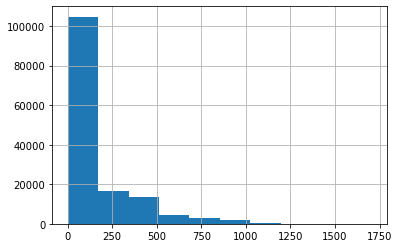

In [20]:
df['max_d'].hist()

In [21]:
df = df.drop(columns=['D1', 'D2', 'D3', 'D4', 'D5',
       'D6', 'D7', 'D8', 'D9', 'D10', 'D12', 'D13', 'D14', 'D15'])

In [22]:
df.sample(2)

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist2,P_emaildomain,R_emaildomain,M4,time_id,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,max_c,max_d
138204,3547295,0,70.702,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,hotmail.com,hotmail.com,M0,543754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN,1.0,17.791666
80597,3246010,1,51.478,C,5812,408.0,185.0,mastercard,224.0,debit,NaN,NaN,0.0,gmail.com,gmail.com,M2,250403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN,2.0,123.000000


Create costumer id column by aggergating data from card, address and email domain

In [23]:
df['customer_id_1'] = df[['card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain']].apply(lambda x: '{}_{}_{}_{}_{}_{}_{}_{}_{}'.format(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8]), axis=1)

In [24]:
df['customer_id_1'].nunique()

38897

In [25]:
df['customer_id'] = pd.factorize(df['customer_id_1'])[0]

In [26]:
df['customer_id'].nunique()

38897

Create new features from time info

In [27]:
df['num_transaction_per_time'] = df['time_id'].map(df['time_id'].value_counts())

In [28]:
df['multi_transaction_per_time'] =  df['num_transaction_per_time'].apply(lambda x: 1 if x>1 else 0)

In [29]:
df = df.drop(columns='customer_id_1')

In [30]:
df = df.drop(columns='time_id')

In [31]:
df.head(1)

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist2,P_emaildomain,R_emaildomain,M4,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,max_c,max_d,customer_id,num_transaction_per_time,multi_transaction_per_time
0,2987004,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1.0,0.0,0,1,0


# 3.0 Output

In [32]:
df.to_pickle("../../../data_lake/output/df_under.pkl")